In [673]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [674]:
train_data=pd.read_csv("Train_Dataset.csv").iloc[0:5180]
test_data=pd.read_csv("Test_Dataset.csv")

---------EDA----------

In [675]:
train_data.head()

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,5110001.0,0.0,35.0,Rarely,Analytics,5.0,CA,Male,69.0,1.0,...,1.0,1.0,1.0,1.0,20.0,7.0,2.0,NaN,M,18932.0
1,5110002.0,1.0,32.0,Yes,Sales,5.0,Statistics,Female,62.0,4.0,...,2.0,0.0,8.0,0.0,20.0,4.0,1.0,NaN,Single,18785.0
2,5110003.0,0.0,31.0,Rarely,Analytics,5.0,Statistics,F,45.0,5.0,...,2.0,1.0,3.0,0.0,26.0,12.0,1.0,3.0,Single,22091.0
3,5110004.0,0.0,34.0,Yes,Sales,10.0,Statistics,Female,32.0,3.0,...,4.0,1.0,1.0,0.0,23.0,5.0,1.0,3.0,Divorsed,20302.0
4,5110005.0,0.0,37.0,No,Analytics,27.0,Statistics,Female,49.0,3.0,...,4.0,1.0,8.0,0.0,21.0,12.0,1.0,9.0,Divorsed,21674.0


In [676]:
test_data.head()

,EmployeeID,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,6110001,18.0,No,NaN,9.0,CA,Male,80.0,3,2,...,3,1,1,0,17.0,0.0,0.0,0.0,Single,16904.0
1,6110002,20.0,Rarely,Analytics,28.0,Statistics,Female,59.0,1,3,...,1,1,2,1,18.0,2.0,1.0,NaN,Single,18994.0
2,6110003,50.0,Rarely,Analytics,19.0,CA,Female,76.0,3,3,...,5,0,5,1,22.0,18.0,3.0,3.0,M,18587.0
3,6110004,32.0,Rarely,Sales,23.0,Statistics,Female,73.0,5,2,...,3,0,4,1,17.0,5.0,3.0,3.0,Married,20559.0
4,6110005,39.0,Rarely,Analytics,7.0,CA,Male,42.0,4,1,...,5,1,4,0,20.0,9.0,1.0,7.0,Married,24991.0


In [677]:
train_data.shape

(5180, 22)

In [678]:
test_data.shape

(2630, 21)

In [679]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5180 entries, 0 to 5179
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EmployeeID          5180 non-null   float64
 1   Attrition           5180 non-null   float64
 2   Age                 4864 non-null   float64
 3   TravelProfile       5180 non-null   object 
 4   Department          5056 non-null   object 
 5   HomeToWork          4925 non-null   float64
 6   EducationField      5180 non-null   object 
 7   Gender              5134 non-null   object 
 8   HourlnWeek          4893 non-null   float64
 9   Involvement         5180 non-null   float64
 10  WorkLifeBalance     5180 non-null   float64
 11  Designation         5142 non-null   object 
 12  JobSatisfaction     5180 non-null   float64
 13  ESOPs               5180 non-null   float64
 14  NumCompaniesWorked  5180 non-null   float64
 15  OverTime            5180 non-null   float64
 16  Salary

In [680]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2630 entries, 0 to 2629
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EmployeeID          2630 non-null   int64  
 1   Age                 2488 non-null   float64
 2   TravelProfile       2630 non-null   object 
 3   Department          2572 non-null   object 
 4   HomeToWork          2504 non-null   float64
 5   EducationField      2630 non-null   object 
 6   Gender              2600 non-null   object 
 7   HourlnWeek          2494 non-null   float64
 8   Involvement         2630 non-null   int64  
 9   WorkLifeBalance     2630 non-null   int64  
 10  Designation         2600 non-null   object 
 11  JobSatisfaction     2630 non-null   int64  
 12  ESOPs               2630 non-null   int64  
 13  NumCompaniesWorked  2630 non-null   int64  
 14  OverTime            2630 non-null   int64  
 15  SalaryHikelastYear  2536 non-null   float64
 16  WorkEx

In [681]:
num_col=['EmployeeID','Involvement','WorkLifeBalance','JobSatisfaction','ESOPs','NumCompaniesWorked','OverTime']
for col in num_col:
    train_data[col]=train_data[col].astype(int)

In [682]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5180 entries, 0 to 5179
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EmployeeID          5180 non-null   int64  
 1   Attrition           5180 non-null   float64
 2   Age                 4864 non-null   float64
 3   TravelProfile       5180 non-null   object 
 4   Department          5056 non-null   object 
 5   HomeToWork          4925 non-null   float64
 6   EducationField      5180 non-null   object 
 7   Gender              5134 non-null   object 
 8   HourlnWeek          4893 non-null   float64
 9   Involvement         5180 non-null   int64  
 10  WorkLifeBalance     5180 non-null   int64  
 11  Designation         5142 non-null   object 
 12  JobSatisfaction     5180 non-null   int64  
 13  ESOPs               5180 non-null   int64  
 14  NumCompaniesWorked  5180 non-null   int64  
 15  OverTime            5180 non-null   int64  
 16  Salary

In [683]:
combine_df=pd.concat([train_data,test_data],axis=0,ignore_index=True)
combine_df.head()

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,5110001,0.0,35.0,Rarely,Analytics,5.0,CA,Male,69.0,1,...,1,1,1,1,20.0,7.0,2.0,NaN,M,18932.0
1,5110002,1.0,32.0,Yes,Sales,5.0,Statistics,Female,62.0,4,...,2,0,8,0,20.0,4.0,1.0,NaN,Single,18785.0
2,5110003,0.0,31.0,Rarely,Analytics,5.0,Statistics,F,45.0,5,...,2,1,3,0,26.0,12.0,1.0,3.0,Single,22091.0
3,5110004,0.0,34.0,Yes,Sales,10.0,Statistics,Female,32.0,3,...,4,1,1,0,23.0,5.0,1.0,3.0,Divorsed,20302.0
4,5110005,0.0,37.0,No,Analytics,27.0,Statistics,Female,49.0,3,...,4,1,8,0,21.0,12.0,1.0,9.0,Divorsed,21674.0


In [684]:
combine_df.tail()

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
7805,6112626,NaN,46.0,Rarely,Sales,12.0,Marketing Diploma,Male,76.0,3,...,5,1,5,1,18.0,10.0,1.0,3.0,Married,26761.0
7806,6112627,NaN,29.0,Rarely,Analytics,22.0,CA,Male,80.0,4,...,5,0,2,0,18.0,7.0,4.0,4.0,Divorsed,19196.0
7807,6112628,NaN,44.0,Rarely,Analytics,8.0,CA,F,42.0,4,...,1,1,3,0,19.0,24.0,5.0,17.0,Married,25248.0
7808,6112629,NaN,NaN,Rarely,Analytics,11.0,Statistics,Female,NaN,4,...,4,0,2,0,18.0,2.0,1.0,1.0,Single,17261.0
7809,6112630,NaN,50.0,Yes,Analytics,1.0,Statistics,F,73.0,3,...,4,1,3,1,24.0,28.0,0.0,7.0,Married,33172.0


In [685]:
combine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7810 entries, 0 to 7809
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EmployeeID          7810 non-null   int64  
 1   Attrition           5180 non-null   float64
 2   Age                 7352 non-null   float64
 3   TravelProfile       7810 non-null   object 
 4   Department          7628 non-null   object 
 5   HomeToWork          7429 non-null   float64
 6   EducationField      7810 non-null   object 
 7   Gender              7734 non-null   object 
 8   HourlnWeek          7387 non-null   float64
 9   Involvement         7810 non-null   int64  
 10  WorkLifeBalance     7810 non-null   int64  
 11  Designation         7742 non-null   object 
 12  JobSatisfaction     7810 non-null   int64  
 13  ESOPs               7810 non-null   int64  
 14  NumCompaniesWorked  7810 non-null   int64  
 15  OverTime            7810 non-null   int64  
 16  Salary

In [686]:
combine_df.isnull().sum()/len(combine_df)*100

EmployeeID             0.000000
Attrition             33.674776
Age                    5.864277
TravelProfile          0.000000
Department             2.330346
HomeToWork             4.878361
EducationField         0.000000
Gender                 0.973111
HourlnWeek             5.416133
Involvement            0.000000
WorkLifeBalance        0.000000
Designation            0.870679
JobSatisfaction        0.000000
ESOPs                  0.000000
NumCompaniesWorked     0.000000
OverTime               0.000000
SalaryHikelastYear     3.367478
WorkExperience         3.956466
LastPromotion          1.626120
CurrentProfile         5.697823
MaritalStatus          0.000000
MonthlyIncome          1.613316
dtype: float64

-----------impute----------

In [687]:
combine_df['Age'].isnull().sum()

np.int64(458)

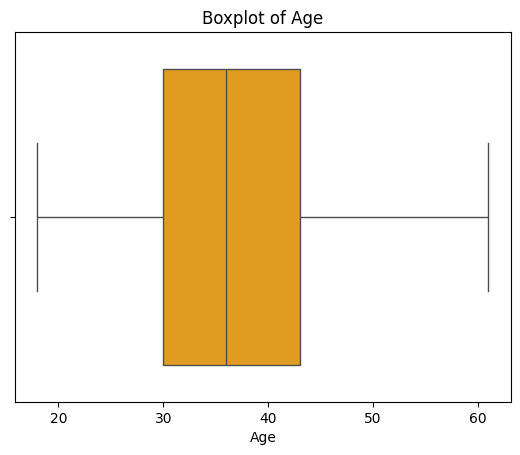

In [688]:
sns.boxplot(data=combine_df, x='Age', color='orange')
plt.title('Boxplot of Age')
plt.show()

In [689]:
combine_df['Age']= combine_df['Age'].fillna(combine_df['Age'].median())


In [690]:
combine_df['Age'].isnull().sum()

np.int64(0)

In [691]:
combine_df['Department']=combine_df['Department'].fillna(combine_df['Department'].mode()[0])
combine_df['Gender']=combine_df['Gender'].fillna(combine_df['Gender'].mode()[0])
combine_df['Designation']=combine_df['Designation'].fillna(combine_df['Designation'].mode()[0])


In [692]:
combine_df['HomeToWork']=combine_df['HomeToWork'].fillna(combine_df['HomeToWork'].median())
combine_df['HourlnWeek']=combine_df['HourlnWeek'].fillna(combine_df['HourlnWeek'].median())
combine_df['SalaryHikelastYear']=combine_df['SalaryHikelastYear'].fillna(combine_df['SalaryHikelastYear'].median())
combine_df['WorkExperience']=combine_df['WorkExperience'].fillna(combine_df['WorkExperience'].median())
combine_df['LastPromotion']=combine_df['LastPromotion'].fillna(combine_df['LastPromotion'].median())
combine_df['CurrentProfile']=combine_df['CurrentProfile'].fillna(combine_df['CurrentProfile'].median())
combine_df['MonthlyIncome']=combine_df['MonthlyIncome'].fillna(combine_df['MonthlyIncome'].median())

In [693]:
combine_df['Gender'].value_counts()

Gender
Male      4744
Female    2020
F         1046
Name: count, dtype: int64

In [694]:
combine_df['MaritalStatus'].value_counts()

MaritalStatus
Single      2709
Married     2455
Divorsed    1493
M           1153
Name: count, dtype: int64

In [695]:
combine_df['Gender']=combine_df['Gender'].replace({'F': 'Female'})
combine_df['MaritalStatus']=combine_df['MaritalStatus'].replace({'M': 'Married'})


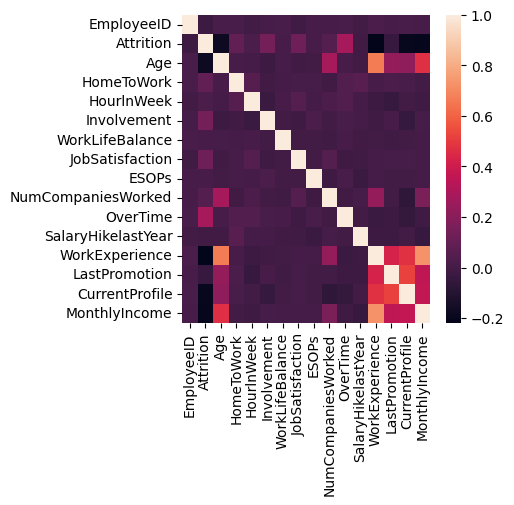

In [696]:
plt.figure(figsize=(4,4))
sns.heatmap(combine_df.select_dtypes(exclude=["object"]).corr())
plt.show()

In [697]:
combine_df.isnull().sum()

EmployeeID               0
Attrition             2630
Age                      0
TravelProfile            0
Department               0
HomeToWork               0
EducationField           0
Gender                   0
HourlnWeek               0
Involvement              0
WorkLifeBalance          0
Designation              0
JobSatisfaction          0
ESOPs                    0
NumCompaniesWorked       0
OverTime                 0
SalaryHikelastYear       0
WorkExperience           0
LastPromotion            0
CurrentProfile           0
MaritalStatus            0
MonthlyIncome            0
dtype: int64

In [698]:
combine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7810 entries, 0 to 7809
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EmployeeID          7810 non-null   int64  
 1   Attrition           5180 non-null   float64
 2   Age                 7810 non-null   float64
 3   TravelProfile       7810 non-null   object 
 4   Department          7810 non-null   object 
 5   HomeToWork          7810 non-null   float64
 6   EducationField      7810 non-null   object 
 7   Gender              7810 non-null   object 
 8   HourlnWeek          7810 non-null   float64
 9   Involvement         7810 non-null   int64  
 10  WorkLifeBalance     7810 non-null   int64  
 11  Designation         7810 non-null   object 
 12  JobSatisfaction     7810 non-null   int64  
 13  ESOPs               7810 non-null   int64  
 14  NumCompaniesWorked  7810 non-null   int64  
 15  OverTime            7810 non-null   int64  
 16  Salary

---------encoding-------

In [699]:
combine_df['Gender']=combine_df['Gender'].map({'Male':1,'Female':0})

In [700]:
combine_df=pd.get_dummies(data=combine_df, columns=['TravelProfile','Department','EducationField','Designation','MaritalStatus'], drop_first=True)
combine_df = combine_df.fillna(0).astype(int)

In [701]:
combine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7810 entries, 0 to 7809
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   EmployeeID                        7810 non-null   int64
 1   Attrition                         7810 non-null   int64
 2   Age                               7810 non-null   int64
 3   HomeToWork                        7810 non-null   int64
 4   Gender                            7810 non-null   int64
 5   HourlnWeek                        7810 non-null   int64
 6   Involvement                       7810 non-null   int64
 7   WorkLifeBalance                   7810 non-null   int64
 8   JobSatisfaction                   7810 non-null   int64
 9   ESOPs                             7810 non-null   int64
 10  NumCompaniesWorked                7810 non-null   int64
 11  OverTime                          7810 non-null   int64
 12  SalaryHikelastYear                

In [702]:
combine_df.head()

,EmployeeID,Attrition,Age,HomeToWork,Gender,HourlnWeek,Involvement,WorkLifeBalance,JobSatisfaction,ESOPs,...,EducationField_MBA,EducationField_Marketing Diploma,EducationField_Other,EducationField_Statistics,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP,MaritalStatus_Married,MaritalStatus_Single
0,5110001,0,35,5,1,69,1,1,1,1,...,0,0,0,0,1,0,0,0,1,0
1,5110002,1,32,5,0,62,4,3,2,0,...,0,0,0,1,1,0,0,0,0,1
2,5110003,0,31,5,0,45,5,3,2,1,...,0,0,0,1,0,1,0,0,0,1
3,5110004,0,34,10,0,32,3,2,4,1,...,0,0,0,1,0,1,0,0,0,0
4,5110005,0,37,27,0,49,3,4,4,1,...,0,0,0,1,0,1,0,0,0,0


In [703]:
train_data = combine_df.iloc[:len(train_data), :].reset_index(drop=True)
test_data = combine_df.iloc[len(train_data):, :].reset_index(drop=True)

In [704]:
train_data.head()

,EmployeeID,Attrition,Age,HomeToWork,Gender,HourlnWeek,Involvement,WorkLifeBalance,JobSatisfaction,ESOPs,...,EducationField_MBA,EducationField_Marketing Diploma,EducationField_Other,EducationField_Statistics,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP,MaritalStatus_Married,MaritalStatus_Single
0,5110001,0,35,5,1,69,1,1,1,1,...,0,0,0,0,1,0,0,0,1,0
1,5110002,1,32,5,0,62,4,3,2,0,...,0,0,0,1,1,0,0,0,0,1
2,5110003,0,31,5,0,45,5,3,2,1,...,0,0,0,1,0,1,0,0,0,1
3,5110004,0,34,10,0,32,3,2,4,1,...,0,0,0,1,0,1,0,0,0,0
4,5110005,0,37,27,0,49,3,4,4,1,...,0,0,0,1,0,1,0,0,0,0


In [705]:
x=train_data.drop(['EmployeeID','Attrition'],axis=1)
y=train_data['Attrition']

In [706]:
x.head()

,Age,HomeToWork,Gender,HourlnWeek,Involvement,WorkLifeBalance,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,...,EducationField_MBA,EducationField_Marketing Diploma,EducationField_Other,EducationField_Statistics,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP,MaritalStatus_Married,MaritalStatus_Single
0,35,5,1,69,1,1,1,1,1,1,...,0,0,0,0,1,0,0,0,1,0
1,32,5,0,62,4,3,2,0,8,0,...,0,0,0,1,1,0,0,0,0,1
2,31,5,0,45,5,3,2,1,3,0,...,0,0,0,1,0,1,0,0,0,1
3,34,10,0,32,3,2,4,1,1,0,...,0,0,0,1,0,1,0,0,0,0
4,37,27,0,49,3,4,4,1,8,0,...,0,0,0,1,0,1,0,0,0,0


In [707]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: Attrition, dtype: int64

In [708]:
test_data=test_data.drop(['EmployeeID','Attrition'],axis=1)

In [709]:
test_data.head()

,Age,HomeToWork,Gender,HourlnWeek,Involvement,WorkLifeBalance,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,...,EducationField_MBA,EducationField_Marketing Diploma,EducationField_Other,EducationField_Statistics,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP,MaritalStatus_Married,MaritalStatus_Single
0,18,9,1,80,3,2,3,1,1,0,...,0,0,0,0,1,0,0,0,0,1
1,20,28,0,59,1,3,1,1,2,1,...,0,0,0,1,1,0,0,0,0,1
2,50,19,0,76,3,3,5,0,5,1,...,0,0,0,0,1,0,0,0,1,0
3,32,23,0,73,5,2,3,0,4,1,...,0,0,0,1,0,1,0,0,1,0
4,39,7,1,42,4,1,5,1,4,0,...,0,0,0,0,0,0,1,0,1,0


-----scaling----

In [710]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(x)
pd.DataFrame(x).head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.209302,-0.933333,1.0,0.325843,-1.0,-1.0,-1.0,1.0,-0.904762,1.0,...,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0
1,-0.348837,-0.933333,-1.0,0.168539,0.5,0.0,-0.5,-1.0,-0.238095,-1.0,...,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0
2,-0.395349,-0.933333,-1.0,-0.213483,1.0,0.0,-0.5,1.0,-0.714286,-1.0,...,-1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0
3,-0.255814,-0.850000,-1.0,-0.505618,0.0,-0.5,0.5,1.0,-0.904762,-1.0,...,-1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0
4,-0.116279,-0.566667,-1.0,-0.123596,0.0,0.5,0.5,1.0,-0.238095,-1.0,...,-1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0


In [711]:
test1=scaler.transform(test_data)
pd.DataFrame(test1).head()


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-1.000000,-0.866667,1.0,0.573034,0.0,-0.5,0.0,1.0,-0.904762,-1.0,...,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0
1,-0.906977,-0.550000,-1.0,0.101124,-1.0,0.0,-1.0,1.0,-0.809524,1.0,...,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0
2,0.488372,-0.700000,-1.0,0.483146,0.0,0.0,1.0,-1.0,-0.523810,1.0,...,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0
3,-0.348837,-0.633333,-1.0,0.415730,1.0,-0.5,0.0,-1.0,-0.619048,1.0,...,-1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0
4,-0.023256,-0.900000,1.0,-0.280899,0.5,-1.0,1.0,1.0,-0.619048,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0


------modeling----

In [712]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [713]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [714]:
models = {
    'LogisticRegression': LogisticRegression(),
    'SVC':SVC(),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
  
}

In [715]:
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    score = accuracy_score(y_test, y_pred)
    print(f"{name} model with accuracy: {score}")

LogisticRegression model with accuracy: 0.8127413127413128
SVC model with accuracy: 0.8532818532818532
KNeighborsClassifier model with accuracy: 0.8465250965250966
DecisionTreeClassifier model with accuracy: 0.9594594594594594
RandomForestClassifier model with accuracy: 0.9903474903474904


In [716]:
randclf = RandomForestClassifier()
randclf.fit(x_train, y_train)
y_pred = randclf.predict(x_test)
score=accuracy_score(y_test, y_pred)
score

0.9893822393822393

In [717]:
final_output=randclf.predict(test1)
final_output

array([1, 0, 0, ..., 0, 1, 0])

In [718]:
pd.DataFrame(final_output)


,0
0,1
1,0
2,0
3,1
4,0
...,...
2625,0
2626,0
2627,0
2628,1


In [719]:
test_data=pd.read_csv("Test_Dataset.csv")

In [720]:
final=pd.concat([test_data,pd.DataFrame(final_output)],axis=1)
final

,EmployeeID,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,...,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome,0
0,6110001,18.0,No,NaN,9.0,CA,Male,80.0,3,2,...,1,1,0,17.0,0.0,0.0,0.0,Single,16904.0,1
1,6110002,20.0,Rarely,Analytics,28.0,Statistics,Female,59.0,1,3,...,1,2,1,18.0,2.0,1.0,NaN,Single,18994.0,0
2,6110003,50.0,Rarely,Analytics,19.0,CA,Female,76.0,3,3,...,0,5,1,22.0,18.0,3.0,3.0,M,18587.0,0
3,6110004,32.0,Rarely,Sales,23.0,Statistics,Female,73.0,5,2,...,0,4,1,17.0,5.0,3.0,3.0,Married,20559.0,1
4,6110005,39.0,Rarely,Analytics,7.0,CA,Male,42.0,4,1,...,1,4,0,20.0,9.0,1.0,7.0,Married,24991.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2625,6112626,46.0,Rarely,Sales,12.0,Marketing Diploma,Male,76.0,3,5,...,1,5,1,18.0,10.0,1.0,3.0,Married,26761.0,0
2626,6112627,29.0,Rarely,Analytics,22.0,CA,Male,80.0,4,4,...,0,2,0,18.0,7.0,4.0,4.0,Divorsed,19196.0,0
2627,6112628,44.0,Rarely,Analytics,8.0,CA,F,42.0,4,1,...,1,3,0,19.0,24.0,5.0,17.0,Married,25248.0,0
2628,6112629,NaN,Rarely,Analytics,11.0,Statistics,Female,NaN,4,3,...,0,2,0,18.0,2.0,1.0,1.0,Single,17261.0,1


In [721]:
employee_id=final['EmployeeID']
employee_id


0       6110001
1       6110002
2       6110003
3       6110004
4       6110005
         ...   
2625    6112626
2626    6112627
2627    6112628
2628    6112629
2629    6112630
Name: EmployeeID, Length: 2630, dtype: int64

In [722]:
attrition=final[0]
attrition

0       1
1       0
2       0
3       1
4       0
       ..
2625    0
2626    0
2627    0
2628    1
2629    0
Name: 0, Length: 2630, dtype: int64

In [723]:
df={'Employee_id':employee_id , 'Attrition':attrition}
pd.DataFrame(df)

,Employee_id,Attrition
0,6110001,1
1,6110002,0
2,6110003,0
3,6110004,1
4,6110005,0
...,...,...
2625,6112626,0
2626,6112627,0
2627,6112628,0
2628,6112629,1
